In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_excel('Datos.xlsx')

In [3]:
filtro = (dataset['PROVINCIA'] == 'PICHINCHA') & (dataset['CANTON'] == 'QUITO')
df_quito = dataset[filtro]

In [4]:
cols_numericas = [
        'VENTAS_NETAS_TARIFA_12', 
        'VENTAS_NETAS_TARIFA_0', 
        'EXPORTACIONES', 
        'COMPRAS_NETAS_TARIFA_12', 
        'COMPRAS_NETAS_TARIFA_0', 
        'IMPORTACIONES', 
        'COMPRAS_RISE', 
        'TOTAL_COMPRAS', 
        'TOTAL_VENTAS'
    ]
df_agrupado = df_quito.groupby('MES')[cols_numericas].sum().reset_index()
df_agrupado = df_agrupado.sort_values('MES')
lista_tuplas = [tuple(x) for x in df_agrupado.to_numpy()]

In [5]:
datos_filtrados = [(x[0], x[-1]) for x in lista_tuplas]
print("Mes | Total Ventas")
for mes, venta in datos_filtrados:
    print(f"{mes:2d}  | {venta}")

Mes | Total Ventas
 1  | 60049501582000
 2  | 62390110492700
 3  | 71169609766500
 4  | 70031459326500
 5  | 68643359899800
 6  | 78388537917200
 7  | 68647183728100
 8  | 70575743977000
 9  | 66856170796300
10  | 69462748814900
11  | 68916342534700
12  | 97103629440700


In [6]:
print(datos_filtrados)

[(1, 60049501582000), (2, 62390110492700), (3, 71169609766500), (4, 70031459326500), (5, 68643359899800), (6, 78388537917200), (7, 68647183728100), (8, 70575743977000), (9, 66856170796300), (10, 69462748814900), (11, 68916342534700), (12, 97103629440700)]


In [7]:
df = pd.DataFrame(datos_filtrados, columns=['Mes', 'Total_Ventas'])
df['Total_Ventas'] = (df['Total_Ventas'] / 1_000_000_000_000).round(2)
df.rename(columns={'Total_Ventas': 'Total_Ventas_Millones'}, inplace=True)
print(df)

    Mes  Total_Ventas_Millones
0     1                  60.05
1     2                  62.39
2     3                  71.17
3     4                  70.03
4     5                  68.64
5     6                  78.39
6     7                  68.65
7     8                  70.58
8     9                  66.86
9    10                  69.46
10   11                  68.92
11   12                  97.10


In [8]:
X = df.iloc[:,0].values 

In [9]:
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [10]:
Y = df.iloc[:,-1].values

In [11]:
print(Y)

[60.05 62.39 71.17 70.03 68.64 78.39 68.65 70.58 66.86 69.46 68.92 97.1 ]


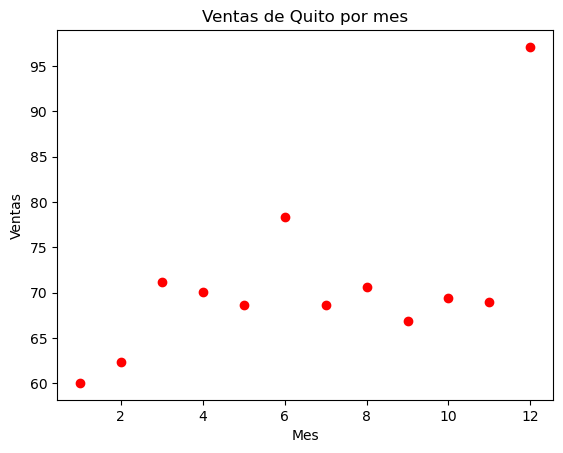

In [12]:
plt.scatter(X,Y, color ="red")
plt.title("Ventas de Quito por mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.show()

In [13]:
X = np.array(X).reshape(-1, 1)  
Y = np.array(Y)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 12)
X_poly_train = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, Y)

LinearRegression()

In [16]:
X_train_sorted = np.sort(X, axis=0)
X_poly_train_sorted = poly_reg.transform(X_train_sorted)
Y_pred_train = lin_reg_2.predict(X_poly_train_sorted)

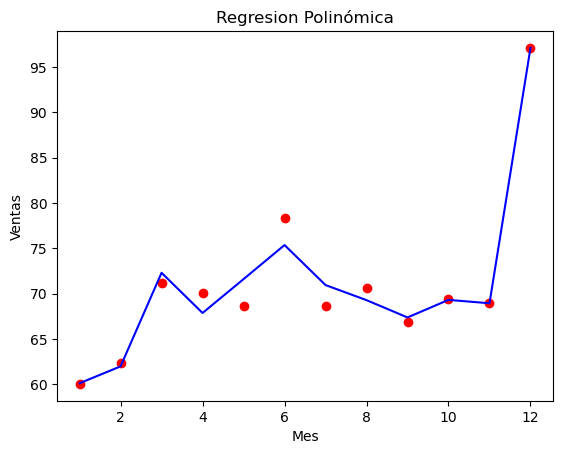

In [17]:
plt.scatter(X, Y, color = 'red')
plt.plot(X_train_sorted,Y_pred_train , color = 'blue')
plt.title('Regresion Polinómica')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

In [18]:
r2_determination_train= lin_reg_2.score(X_poly_train,Y)

In [19]:
print(f"R^2 POLINOMICO TRAIN = {r2_determination_train}")

R^2 POLINOMICO TRAIN = 0.967551629676236


In [20]:
dataset_2 = pd.read_excel('Datos2.xlsx')

In [21]:
filtro = (dataset_2['PROVINCIA'] == 'PICHINCHA') & (dataset_2['CANTON'] == 'QUITO')
df_quito_2 = dataset_2[filtro]

In [22]:
df_agrupado_2 = df_quito_2.groupby('MES')[cols_numericas].sum().reset_index()
df_agrupado_2 = df_agrupado_2.sort_values('MES')
lista_tuplas_2 = [tuple(x) for x in df_agrupado_2.to_numpy()]

In [23]:
datos_filtrados_2 = [(x[0], x[-1]) for x in lista_tuplas_2]
print("Mes | Total Ventas")
for mes, venta in datos_filtrados_2:
    print(f"{mes:2d}  | {venta}")

Mes | Total Ventas
 1  | 61184956509300
 2  | 60743434106900
 3  | 69466433304600
 4  | 65732317703200
 5  | 66849965552700
 6  | 87259259692900
 7  | 65782897668500
 8  | 68613861968200
 9  | 70834149417000
10  | 69169173722500
11  | 69861251454600
12  | 101544150908000


In [24]:
df_2 = pd.DataFrame(datos_filtrados_2, columns=['Mes', 'Total_Ventas'])
df_2['Total_Ventas'] = (df_2['Total_Ventas'] / 1_000_000_000_000).round(2)
df_2.rename(columns={'Total_Ventas': 'Total_Ventas_Millones'}, inplace=True)
print(df_2)

    Mes  Total_Ventas_Millones
0     1                  61.18
1     2                  60.74
2     3                  69.47
3     4                  65.73
4     5                  66.85
5     6                  87.26
6     7                  65.78
7     8                  68.61
8     9                  70.83
9    10                  69.17
10   11                  69.86
11   12                 101.54


In [25]:
X_2 = df_2.iloc[:,0].values 

In [26]:
Y_2 = df_2.iloc[:,-1].values

In [27]:
X_2 = np.array(X_2).reshape(-1, 1)  
Y_2 = np.array(Y_2)

In [28]:
X_test_sorted_2 = np.sort(X_2,axis=0)
X_test_sorted_poly_2 = poly_reg.transform(X_test_sorted_2)
Y_pred_test_2=lin_reg_2.predict(X_test_sorted_poly_2)

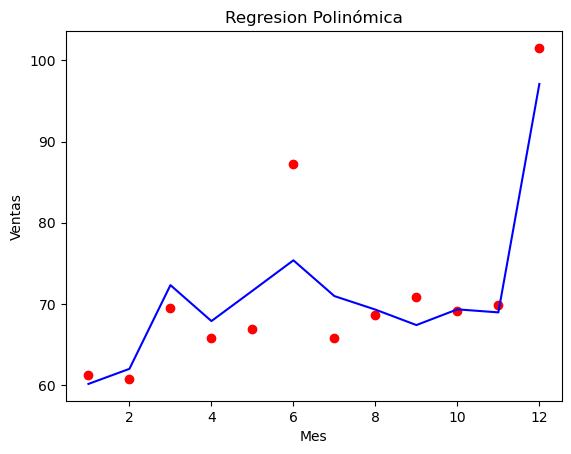

In [29]:
plt.scatter(X_2, Y_2, color = 'red')
plt.plot(X_test_sorted_2,Y_pred_test_2 , color = 'blue')
plt.title('Regresion Polinómica')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

In [30]:
X_test_poly_2 = poly_reg.fit_transform(X_2)
r2_determination_test= lin_reg_2.score(X_test_poly_2,Y_2)
print(f"R^2 POLINOMICO TEST = {r2_determination_test}")

R^2 POLINOMICO TEST = 0.8385836184230094
